In [1]:
import gdown, os

url = 'https://drive.google.com/uc?id=1J6NBvQ7m3oP1mfTfm3gM3nUMbWlVQUfe'
output_path = 'oct.zip'
if not os.path.exists(output_path):
    gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1J6NBvQ7m3oP1mfTfm3gM3nUMbWlVQUfe
To: /content/oct.zip
941MB [00:03, 284MB/s]


In [2]:
!unzip oct.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct_images/17209.jpeg   
  inflating: oct_images/10586.jpeg   
  inflating: oct_images/23837.jpeg   
  inflating: oct_images/12198.jpeg   
  inflating: oct_images/12060.jpeg   
  inflating: oct_images/11143.jpeg   
  inflating: oct_images/4008.jpeg    
  inflating: oct_images/25821.jpeg   
  inflating: oct_images/13197.jpeg   
  inflating: oct_images/4108.jpeg    
  inflating: oct_images/25631.jpeg   
  inflating: oct_images/6423.jpeg    
  inflating: oct_images/11208.jpeg   
  inflating: oct_images/16786.jpeg   
  inflating: oct_images/5077.jpeg    
  inflating: oct_images/6006.jpeg    
  inflating: oct_images/25708.jpeg   
  inflating: oct_images/23486.jpeg   
  inflating: oct_images/15053.jpeg   
  inflating: oct_images/7535.jpeg    
  inflating: oct_images/14333.jpeg   
  inflating: oct_images/8657.jpeg    
  inflating: oct_images/13159.jpeg   
  inflating: oct_images/17242.jpeg   
  inflating: oct_images/23388.jpeg   

In [3]:
!rm oct.zip

In [4]:
!git clone https://github.com/dvschultz/stylegan2-ada

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 56.16 MiB | 34.21 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [5]:
cd stylegan2-ada/

/content/stylegan2-ada


In [6]:
mkdir downloads

In [7]:
mkdir datasets

In [8]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# replace with this function in the dataset_tools.py

def create_from_images(tfrecord_dir, image_dir, shuffle):
    print('Loading images from "%s"' % image_dir)
    image_filenames = sorted(glob.glob(os.path.join(image_dir, '*')))
    if len(image_filenames) == 0:
        error('No input images found')

    img = np.asarray(PIL.Image.open(image_filenames[0]))
    resolution = img.shape[0]
    channels = img.shape[2] if img.ndim == 3 else 1
    if img.shape[1] != resolution:
        print('ye')
        #error('Input images must have the same width and height')
    if resolution != 2 ** int(np.floor(np.log2(resolution))):
        print('ye')
        #error('Input image resolution must be a power-of-two')
    if channels not in [1, 3]:
        error('Input images must be stored as RGB or grayscale')

    with TFRecordExporter(tfrecord_dir, len(image_filenames)) as tfr:
        order = tfr.choose_shuffled_order() if shuffle else np.arange(len(image_filenames))
        for idx in range(order.size):
            img = np.asarray(PIL.Image.open(image_filenames[order[idx]]))
            if img.shape[0] != 512:
              continue
            if img.shape[1] != 512:
              continue
            # img_cropped = crop_center(img, 1024, 1024)
            img_pil = PIL.Image.fromarray(img).resize((256, 256), PIL.Image.ANTIALIAS)
            img = np.asarray(img_pil)
            print(img.shape)
            if channels == 1:
                #print('exactly')
                img = img[np.newaxis, :, :] # HW => CHW
                img = np.repeat(img, 3, 0)
            else:
                img = img.transpose([2, 0, 1]) # HWC => CHW
            tfr.add_image(img)

In [9]:
#update this to the path to your image folder
dataset_path = "/content/oct_images"
#give your dataset a name
dataset_name = "oct"

#you don't need to edit anything here
!python dataset_tool.py create_from_images ./datasets/{dataset_name} {dataset_path}

Streaming output truncated to the last 5000 lines.
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(25

In [10]:
pwd

'/content/stylegan2-ada'

In [11]:
#this name must EXACTLY match the dataset name you used when creating the .tfrecords file
dataset_name = "oct"
#how often should the model generate samples and a .pkl file
snapshot_count = 1
#should the images be mirrored left to right?
mirrored = True
#should the images be mirrored top to bottom?
mirroredY = False
#metrics? 
metric_list = None
#augments
augs = "bg"

#
# this is the most important cell to update
#
# running it for the first time? set it to ffhq(+resolution)
# resuming? get the path to your latest .pkl file and use that
resume_from = "/content/drive/MyDrive/oct_latest.pkl"

#don't edit this unless you know what you're doing :)
#!python train.py --outdir ./results --snap={snapshot_count} --cfg=11gb-gpu --data=./datasets/{dataset_name} --augpipe={augs} --mirror={mirrored} --mirrory={mirroredY} --metrics={metric_list} --resume={resume_from} --augpipe="bg"
!python train.py --outdir ./results --snap={snapshot_count} --cfg=auto --data=./datasets/{dataset_name}  --mirror={mirrored} --mirrory={mirroredY} --metrics={metric_list} --aug="noaug" --resume={resume_from}

tcmalloc: large alloc 4294967296 bytes == 0x56053a38c000 @  0x7f0a4e31d001 0x7f0a4b52054f 0x7f0a4b570b58 0x7f0a4b574b17 0x7f0a4b613203 0x5605328a30a4 0x5605328a2da0 0x560532917868 0x560532912235 0x5605328a4fec 0x5605328e5bc9 0x5605328e2ac4 0x5605328a38a9 0x560532917b0a 0x560532911c35 0x5605327e3e2c 0x560532914318 0x560532911c35 0x5605327e3e2c 0x560532914318 0x560532912235 0x5605327e3e2c 0x560532914318 0x5605328a465a 0x560532912b0e 0x560532911c35 0x560532911933 0x5605329db402 0x5605329db77d 0x5605329db626 0x5605329b3313
tcmalloc: large alloc 4294967296 bytes == 0x56063a38c000 @  0x7f0a4e31b1e7 0x7f0a4b52046e 0x7f0a4b570c7b 0x7f0a4b57135f 0x7f0a4b613103 0x5605328a30a4 0x5605328a2da0 0x560532917868 0x560532911c35 0x5605328a473a 0x56053291393b 0x560532911c35 0x5605328a473a 0x56053291393b 0x560532911c35 0x5605328a473a 0x56053291393b 0x5605328a465a 0x560532912b0e 0x560532911c35 0x5605328a473a 0x560532916f40 0x560532911c35 0x5605328a473a 0x56053291393b 0x560532912235 0x5605328a4fec 0x5605328e

In [12]:
!git clone https://github.com/levindabhi/stylegan2-pytorch.git

Cloning into 'stylegan2-pytorch'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 383 (delta 3), reused 9 (delta 3), pack-reused 372
Receiving objects: 100% (383/383), 122.51 MiB | 36.38 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [13]:
cd stylegan2-pytorch/

/content/stylegan2-ada/stylegan2-pytorch


In [14]:
!git clone https://github.com/NVlabs/stylegan2-ada.git

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.


In [15]:
!pip install ninja

     |████████████████████████████████| 108 kB 9.0 MB/s 


Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.


/content/stylegan2-ada/stylegan2-pytorch/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.9.0+cu102. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."


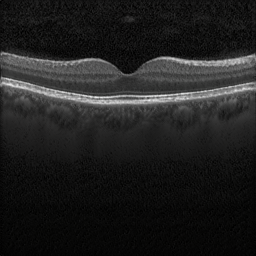

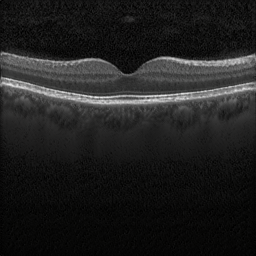

In [17]:
%tensorflow_version 1.x
import PIL 
from PIL import Image

import argparse
import os
import sys
import pickle
import math

import torch
import numpy as np
from torchvision import utils

from model import Generator, Discriminator
from convert_weight import convert_modconv, convert_conv, convert_torgb, convert_dense, update, discriminator_fill_statedict, fill_statedict

output_path = '/content/stylegan2-ada/results/00000-oct-mirror-auto1-noaug-resumecustom/network-snapshot-000915.pkl'

class parser():
    def __init__(self):
        self.repo = 'stylegan2-ada'
        self.gen = False
        self.disc = False
        self.channel_multiplier = 2
        self.path = None

args = parser()

args.repo = 'stylegan2-ada'
args.gen = True
args.disc = True
args.path = output_path
sys.path.append(args.repo)

import dnnlib
from dnnlib import tflib

tflib.init_tf()

with open(args.path, "rb") as f:
    generator, discriminator, g_ema = pickle.load(f)
    Gs = g_ema
    _D = discriminator
    _G = generator

size = g_ema.output_shape[2]

n_mlp = 0
mapping_layers_names = g_ema.__getstate__()['components']['mapping'].list_layers()
for layer in mapping_layers_names:
    if layer[0].startswith('Dense'):
        n_mlp += 1

g = Generator(size, 512, n_mlp, channel_multiplier=1)#args.channel_multiplier)
state_dict = g.state_dict()
state_dict = fill_statedict(state_dict, g_ema.vars, size, n_mlp)

g.load_state_dict(state_dict)

latent_avg = torch.from_numpy(g_ema.vars["dlatent_avg"].value().eval())

ckpt = {"g_ema": state_dict, "latent_avg": latent_avg}

# if args.gen:
#     g_train = Generator(size, 512, n_mlp, channel_multiplier=args.channel_multiplier)
#     g_train_state = g_train.state_dict()
#     g_train_state = fill_statedict(g_train_state, generator.vars, size, n_mlp)
#     ckpt["g"] = g_train_state

# if args.disc:
#     disc = Discriminator(size, channel_multiplier=args.channel_multiplier)
#     d_state = disc.state_dict()
#     d_state = discriminator_fill_statedict(d_state, discriminator.vars, size)
#     ckpt["d"] = d_state
#     disc.load_state_dict(d_state)

# name = os.path.splitext(os.path.basename(args.path))[0]
# torch.save(ckpt, name + ".pt")

device='cuda'

n_sample = 1
g = g.to(device)

inputSize=1024
z = np.random.RandomState(0).randn(n_sample, 512).astype("float32")

with torch.no_grad():
    img_pt, _ = g(
        [torch.from_numpy(z).to(device)],
        truncation=0.5,
        truncation_latent=latent_avg.to(device),
        randomize_noise=False,
    )

Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.randomize_noise = False
img_tf = g_ema.run(z, None, **Gs_kwargs)
img_tf = torch.from_numpy(img_tf).to(device)

def fmtImg(r):
    img = ((r+1)/2*256).clip(0,255).astype(np.uint8).transpose(1,2,0)
    return PIL.Image.fromarray(img, 'RGB')

#verify that everthing is working fine and these images match
img=img_pt.cpu().numpy()[0]
display(fmtImg(img))
img = img_tf.cpu().numpy()[0]
display(fmtImg(img))

In [18]:
torch.save(g.state_dict(), 'oct_256_latest.pth')